In [23]:
import pandas as pd
import os
import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

print(sys.version)


# 打印当前路径
abs_path = os.path.abspath('.')

current_path = abs_path + '/tmp/pycharm_project_317/random_forest/'
train_data_path = current_path + 'train.csv'

data_raw= pd.read_csv(train_data_path)
data_raw.head()

3.7.11 (default, Jul 27 2021, 14:32:16) 
[GCC 7.5.0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
test_data_path = current_path + 'test.csv'
data_val = pd.read_csv(test_data_path)
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
# 将列名称转换成小写格式
data_raw.columns = data_raw.columns.str.lower()
data_val.columns = data_val.columns.str.lower()

In [36]:
data_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='survived', ylabel='count'>

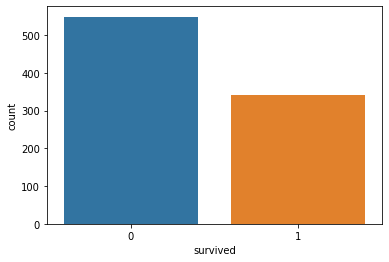

In [37]:
# 绘制幸存者和非幸存者数量图
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(data_raw['survived'])

In [38]:
# 合并两个数据集，进行统一的清洗

data_all = [data_raw, data_val]

In [47]:
dict(data_raw.isnull().sum())

{'passengerid': 0,
 'survived': 0,
 'pclass': 0,
 'name': 0,
 'sex': 0,
 'age': 177,
 'sibsp': 0,
 'parch': 0,
 'ticket': 0,
 'fare': 0,
 'cabin': 687,
 'embarked': 2}

In [48]:
dict(data_val.isnull().sum())

{'passengerid': 0,
 'pclass': 0,
 'name': 0,
 'sex': 0,
 'age': 86,
 'sibsp': 0,
 'parch': 0,
 'ticket': 0,
 'fare': 1,
 'cabin': 327,
 'embarked': 0}

In [49]:
# 对数据源进行描述
data_raw.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Birkeland, Mr. Hans Martin Monsen",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [52]:
# 对原始数据进行清理
for dataset in data_all:
    dataset['age'].fillna(dataset['age'].median(), inplace=True) #年龄为空值的数据设置为中位数
    dataset['fare'].fillna(dataset['fare'].median(), inplace=True) #将票价为空的数据设置为中位数
    dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True) #将登船港口为空的数据设置为最多的一个港口

In [54]:
# 删除一些字段
drop_columns = ['passengerid', 'ticket', 'cabin']

data_raw.drop(drop_columns, axis=1, inplace=True)
data_val.drop(drop_columns, axis=1, inplace=True)

In [55]:
dict(data_raw.isnull().sum()) #训练集

{'survived': 0,
 'pclass': 0,
 'name': 0,
 'sex': 0,
 'age': 0,
 'sibsp': 0,
 'parch': 0,
 'fare': 0,
 'embarked': 0}

In [56]:
dict(data_val.isnull().sum())

{'pclass': 0,
 'name': 0,
 'sex': 0,
 'age': 0,
 'sibsp': 0,
 'parch': 0,
 'fare': 0,
 'embarked': 0}

UsageError: Cell magic `%%md` not found.


进行特征构造

In [61]:
for dataset in data_all:
    # 构建新的字段：
    # （1）family_size 家庭规模：sibsp + parch
    dataset['family_size'] = dataset['sibsp'] + dataset['parch'] + 1
    # （2）单身 single ,1 : 单身， 0 ：非单身
    dataset['single'] = 1 # 默认单身
    dataset['single'].loc[dataset['family_size'] > 1] = 0 #家庭大小大于1，设置为非单身
    # （3）身份 title
    dataset['title'] = dataset['name'].str.split(', ',  expand=True)[1].str.split('.', expand=True)[0]
    # dataset['title'] = dataset['name'].apply(lambda x : x.split(,)[1]).apply(lambda x : x.split('.')[0])
    # （4） 票价 fare_bin
    dataset['fare_bin'] = pd.qcut(dataset['fare'], 4) # 根据票价，分成四个票价范围（每个范围的数量一样）
    # （5）年龄 age_bin
    dataset['age_bin'] = pd.cut(dataset['age'].astype(int), 5) # 根据年龄，分成5个年龄区间，每个区间人数不一样

/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
dataset.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


In [67]:
# 统计不同title的人数
dict(data_raw['title'].value_counts())

{'Mr': 517,
 'Miss': 182,
 'Mrs': 125,
 'Master': 40,
 'Dr': 7,
 'Rev': 6,
 'Mlle': 2,
 'Col': 2,
 'Major': 2,
 'Mme': 1,
 'Jonkheer': 1,
 'the Countess': 1,
 'Capt': 1,
 'Don': 1,
 'Sir': 1,
 'Lady': 1,
 'Ms': 1}

In [76]:
title_names = (data_raw['title'].value_counts() < 10)
dict(title_names)

{'Mr': False, 'Miss': False, 'Mrs': False, 'Master': False, 'other': False}

In [77]:
#  title ：将那些称谓所在的人数小于10的数据，全部归为一类：other
data_raw['title'] = data_raw['title'].apply(lambda x:'other' if title_names[x] else x)   #括号里和C的三目运算符很像，条件？A:B  =>条件成立则为A，否则为B

In [83]:
print(data_raw['title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64


In [84]:
print(data_raw['survived'].groupby(data_raw['title']).mean())

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64


构建新的字段，基于scikit-learn (sklearn)中的LableEncoder()

In [85]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [86]:
label = LabelEncoder()

In [87]:
for dataset in data_all:
    # (1)新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    # (2)新字段：embarked_code
    dataset['embarker_code'] = label.fit_transform(dataset['embarked'])
    # (3)新字段：title_code
    dataset['title_code'] = label.fit_transform(dataset['title'])
    # (4)新字段：fare_bin_coode
    dataset['fare_bin_code'] = label.fit_transform(dataset['fare_bin'])
    # (5)新字段：age_bin_code
    dataset['age_bin_code'] = label.fit_transform(dataset['age_bin'])

In [88]:
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarker_code,title_code,fare_bin_code,age_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,3,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,3,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,1,2


In [91]:
# 打印列的名称
data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarker_code',
 'title_code',
 'fare_bin_code',
 'age_bin_code']

方式一：特征选择

In [92]:
Target = ['survived']

In [94]:
data_columns_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size',
                    'single']

In [95]:
columns_one = Target + data_columns_one

方式二：特征选择

In [109]:
data_columns_two = ['sex_code', 'pclass', 'embarker_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']

In [110]:
columns_two = Target + data_columns_two

方式三：特征选择

In [123]:
data_columns_three = ['sex_code', 'pclass', 'embarker_code', 'title_code', 'family_size', 'fare_bin_code', 'age_bin_code']

In [124]:
columns_three = Target + data_columns_three

### 通过Pandas中的get_dummies() 进行编码

In [125]:
data_one_dummy = pd.get_dummies(data_raw[data_columns_one])

In [126]:
data_one_dummy_list = data_one_dummy.columns.tolist()

In [127]:
len(data_one_dummy_list)

17

### 获取训练集和测试集

### 方式一：训练集额测试集

In [128]:
X_train_one, X_test_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list], data_raw[Target], random_state=0)

In [129]:
X_train_one.shape

(668, 17)

In [130]:
X_test_one.shape

(223, 17)

### 方式二：训练集和测试集

In [131]:
X_train_two, X_test_two, y_train_two, y_test_two = model_selection.train_test_split(data_raw[data_columns_two], data_raw[Target], random_state=0)

In [132]:
X_train_two.shape

(668, 8)

In [133]:
X_test_two.shape

(223, 8)

### 方式三：训练集和测试集

In [134]:
X_train_three, X_test_two, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_columns_three], data_raw[Target], random_state=0)

In [135]:
X_train_three.shape

(668, 7)

### 随机森林算法实现

In [136]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

In [145]:
param_gird = {
    'criterion' : ['gini', 'entropy'], # 使用基尼系数和熵进行评估
    'min_samples_leaf' : [1, 5, 10],
    'min_samples_split' : [2, 4, 10, 12, 16],
    'n_estimators' : [50, 100, 400, 700, 1000]
}

In [146]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=rf,
                  param_grid=param_gird,
                  scoring= 'accuracy',
                  cv=3,   # cross-validation, 这里是3折交叉验证
                  n_jobs=-1)

###(1)对特征进行训练

In [147]:
gs = gs.fit(X_train_one, y_train_one)

/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [148]:
print(gs.best_score_)

0.8323839534601868


In [149]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [150]:
# 创建一个对象
rf2 = RandomForestClassifier(criterion='entropy',
                             min_samples_leaf=5,
                             min_samples_split=12,
                             n_estimators=50,
                             n_jobs=-1,
                             random_state=1)

In [151]:
rf2.fit(X_train_one, y_train_one)

/home/zhouyuhua/anaconda3/envs/pytorch_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [152]:
X_train_one.head()

,pclass,sibsp,parch,age,fare,family_size,single,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_other
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,1,0,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,1,0,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,1,0,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,1,0,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,1,0


In [154]:
# 根据特征的重要性进行排序
pd.concat((pd.DataFrame(X_train_one.iloc[:, 1:].columns, columns=['Variable']),
          pd.DataFrame(rf2.feature_importances_, columns=['importance'])),
          axis=1).sort_values(by='importance', ascending=False)

,Variable,importance
7,sex_male,0.158834
14,title_Mrs,0.150353
4,family_size,0.138901
8,embarked_C,0.123423
3,fare,0.108769
0,sibsp,0.092098
5,single,0.053961
1,parch,0.042367
15,title_other,0.034270
2,age,0.019245


###在test上进行预测

In [156]:
pred = rf2.predict(X_test_one)

In [157]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [158]:
pred_df.head()

,survived
0,0
1,0
2,0
3,1
4,1


###！注意：最终在test.csv上预测

In [159]:
data_val_dummy = pd.get_dummies(data_val[data_columns_one])

In [160]:
data_val_dummy.head()

,pclass,sibsp,parch,age,fare,family_size,single,sex_female,sex_male,embarked_C,...,embarked_S,title_Col,title_Dona,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Ms,title_Rev
0,3,0,0,34.5,7.8292,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,3,1,0,47.0,7.0000,2,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,0,0,62.0,9.6875,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,27.0,8.6625,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,3,1,1,22.0,12.2875,3,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [161]:
data_val_dummy_list = data_val_dummy.columns.tolist()

In [163]:
data_val_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Col',
 'title_Dona',
 'title_Dr',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Ms',
 'title_Rev']

In [171]:
pred_val = rf2.predict(data_val_dummy[[
                                         'pclass',
                                         'age',
                                         'fare',
                                         'family_size',
                                         'single',
                                         'sex_female',
                                         'sex_male',
                                         'embarked_C',
                                         'embarked_Q',
                                         'embarked_S',
                                         'title_Col',
                                         'title_Dona',
                                         'title_Dr',
                                         'title_Master',
                                         'title_Miss',
                                         'title_Mr',
                                         'title_Mrs',]])

In [178]:
pred_val_df = pd.DataFrame(pred_val, columns=['survived'])

In [179]:
pred_val_df.head(20)

,survived
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,0


In [180]:
# submission = pd.DataFrame({'passengerid':data_val, 'survived':pred_val['survived']})
pred_val_df.shape

(418, 1)

In [197]:
id, label = 'PassengerId', 'survived'

data_test = pd.read_csv(test_data_path)
print(data_test['PassengerId'])

# submission = pd.DataFrame({id:data_test[id], label:pred_val_df})


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [198]:
print(pred_val_df)

     survived
0           0
1           0
2           0
3           1
4           0
..        ...
413         1
414         1
415         1
416         1
417         1

[418 rows x 1 columns]
